In [38]:
#Importar librerias
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

Text(0, 0.5, 'Mega Watts/hora')

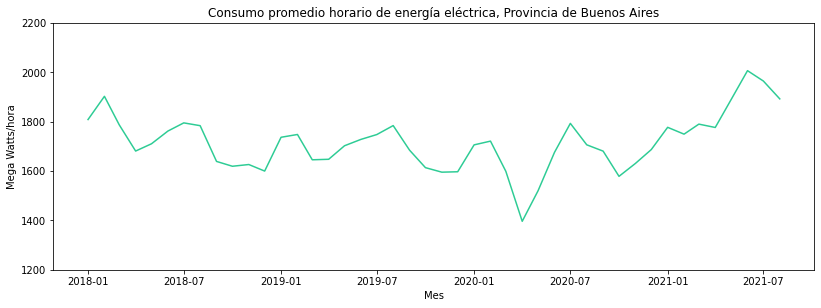

In [39]:
#import '"Fuente chart.xlsx"
df = pd.read_excel('Fuente chart.xlsx')
#Plot Fuente chart series in different plots, y axis starting from 1000
plt.figure(figsize=(30,10))
plt.subplot(2,2,1)
sns.lineplot(x='Fecha', y='Energia PBA', data=df,  color='#2ecc95')
#Change y axis starting from 1000
plt.ylim(1200,2200)
plt.title('Consumo promedio horario de energía eléctrica, Provincia de Buenos Aires')
plt.xlabel('Mes')
plt.ylabel('Mega Watts/hora')

In [40]:
#Import BSASok.xls
series = pd.read_excel('BSASok.xls')
series2 = series[-168:]
series2 = series2.pivot("Tipo dia", "Hora", "Mega Watts/hora")

#Size of the plot
plt.figure(figsize=(12,5))
plt.title('Consumo de energía eléctrica en Mega Watts, Provincia de Buenos Aires')
ax = sns.heatmap(series2, cmap="flare", fmt=".0f")

FileNotFoundError: [Errno 2] No such file or directory: 'BSASok.xls'

<h1> Data cleaning</h1>

Importar el csv con consumo de energia (MW) y Temperatura (C°) con el fin de:
* Visualizar datos.
* Identificar outliers y removerlos.
* Tratar los valores nulos.
* Comprobar si fueron resueltos los problemas.

In [41]:
# Importar csv que posee Consumo de energia y Temperatura de 23 provincias + CABA.
df = pd.read_csv("BASE.csv", header = 0, parse_dates = [0], index_col = 0, dayfirst=True)
#Split dataframe before september 2021
df = df[df.index < '2021-09-01 00:00:00']
df.tail()

,Hora,Tipo Dia,Energia PBA,Clima PBA,Energia GBA,Clima GBA,Año,Mes
Fecha,,,,,,,,
2021-08-31 19:00:00,19,3,1869.0,19.5,5511.6,19.5,2021,8
2021-08-31 20:00:00,20,3,2012.2,19.4,5980.3,19.4,2021,8
2021-08-31 21:00:00,21,3,2023.7,20.0,6096.7,20.0,2021,8
2021-08-31 22:00:00,22,3,1937.8,19.1,5955.7,19.1,2021,8
2021-08-31 23:00:00,23,3,1821.6,19.0,5490.5,19.0,2021,8


In [42]:
#Estadisticas descriptivas
df.describe()

,Hora,Tipo Dia,Energia PBA,Clima PBA,Energia GBA,Clima GBA,Año,Mes
count,32136.000000,32136.000000,32136.000000,31912.000000,32136.000000,32136.000000,32136.000000,32136.000000
mean,11.500000,3.899925,1714.985138,14.286419,5644.182677,18.388233,2019.363704,6.159821
std,6.922294,2.068067,235.764493,6.284723,1243.211472,6.437557,1.067520,3.359277
min,0.000000,1.000000,1054.700000,-3.600000,2952.500000,0.000000,2018.000000,1.000000
25%,5.750000,2.000000,1545.600000,9.800000,4713.475000,13.500000,2018.000000,3.000000
50%,11.500000,4.000000,1707.000000,14.100000,5521.000000,18.400000,2019.000000,6.000000
75%,17.250000,6.000000,1874.300000,18.600000,6424.125000,23.000000,2020.000000,9.000000
max,23.000000,7.000000,2455.900000,35.600000,9863.200000,37.300000,2021.000000,12.000000


In [43]:
# Hay NaN?
df.isna().sum()

Hora             0
Tipo Dia         0
Energia PBA      0
Clima PBA      224
Energia GBA      0
Clima GBA        0
Año              0
Mes              0
dtype: int64

No handles with labels found to put in legend.
No handles with labels found to put in legend.


Text(0.5, 1.0, 'Consumo de energía eléctrica horario, Gran Buenos Aires')

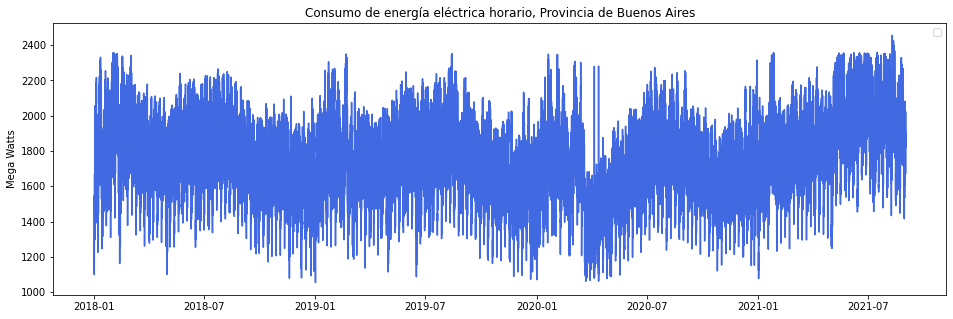

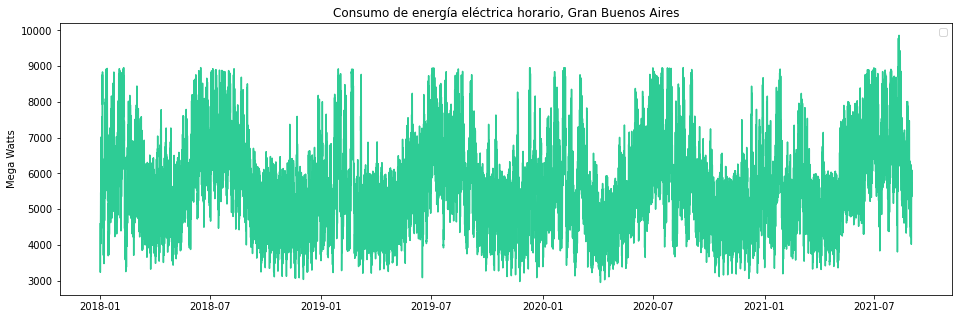

In [44]:
#Plot 'Energia GBA' in one plot and 'Energia PBA' in another plot as series
plt.figure(figsize=(16,5))
#Color blue for 'Energia PBA'
plt.plot(df['Energia PBA'], color= '#4169e1')
plt.ylabel('Mega Watts')
plt.legend()
plt.title('Consumo de energía eléctrica horario, Provincia de Buenos Aires')


plt.figure(figsize=(16,5))
plt.plot(df['Energia GBA'], color='#2ecc95')
plt.ylabel('Mega Watts')
plt.legend()
plt.title('Consumo de energía eléctrica horario, Gran Buenos Aires')


### Hace falta corregir la existencia de outliers para los datos de energia y valores nulos para el caso de la temperatura.
### Para el tratamiento de outliers consideramos dos opciones: z-score e IQR.\
### Al no ser distribuciones perfectamente normales en todos los casos, utilizamos el IQR.


array([[<AxesSubplot:title={'center':'Energia PBA'}>,
        <AxesSubplot:title={'center':'Clima PBA'}>],
       [<AxesSubplot:title={'center':'Energia GBA'}>,
        <AxesSubplot:title={'center':'Clima GBA'}>]], dtype=object)

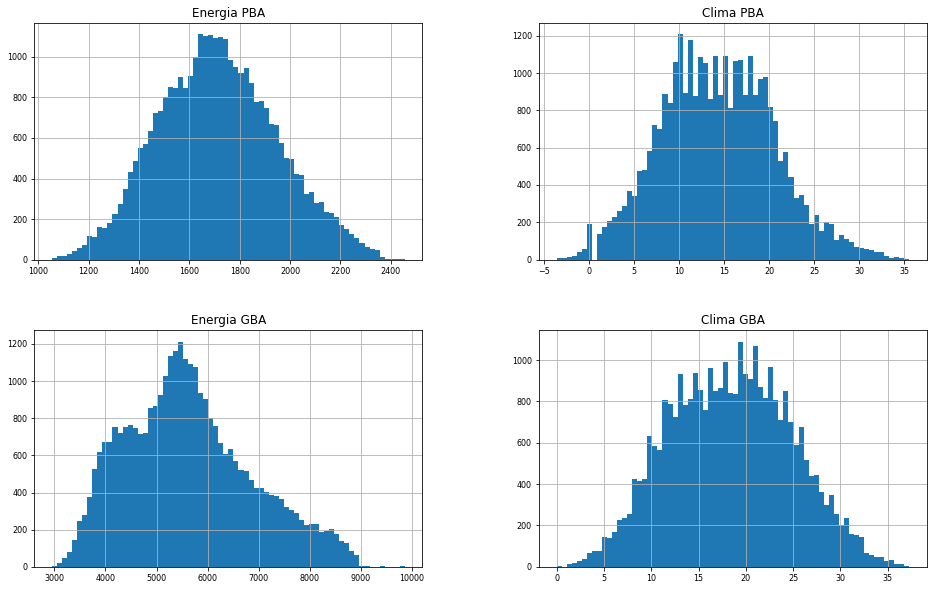

In [45]:
#Histogramas
df.iloc[:,2:6].hist(figsize=(16, 10), bins=70, xlabelsize=8, ylabelsize=8)

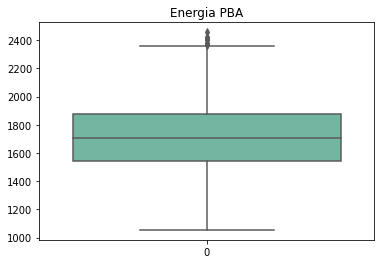

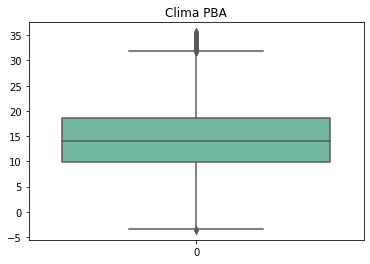

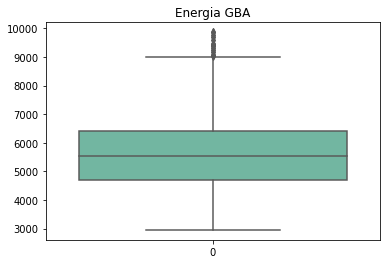

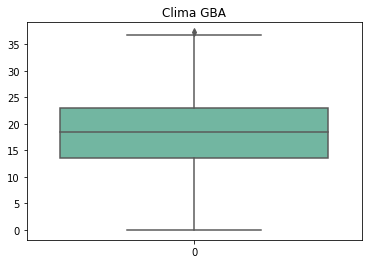

In [46]:
#Graficos de boxplot 
for column in df.columns[2:6]:
    plt.figure()
    sns.boxplot(data=df[column], palette="Set2").set_title(column)

In [48]:
#Calculo del rango intercuartil
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Hora             11.50
Tipo Dia          4.00
Energia PBA     328.70
Clima PBA         8.80
Energia GBA    1710.65
Clima GBA         9.50
Año               2.00
Mes               6.00
dtype: float64


In [49]:
#Reemplazar outliers con NaN utilizando el IQR

df = df.mask((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)), np.nan)
df.isna().sum()

Hora             0
Tipo Dia         0
Energia PBA     11
Clima PBA      340
Energia GBA     16
Clima GBA        1
Año              0
Mes              0
dtype: int64

#### Fueron removidos los outliers, para completar los valores nulos se prueban distintos metodos, dando mejor resultado el KNN.

In [50]:
rmse = lambda y, yhat: np.sqrt(mean_squared_error(y, yhat))
def optimize_k(data, target):
    errors = []
    for k in range(1, 20, 2):
        imputer = KNNImputer(n_neighbors=k)
        imputed = imputer.fit_transform(data)
        df_imputed = pd.DataFrame(imputed, columns=df.columns)
        
        X = df_imputed.drop(target, axis=1)
        y = df_imputed[target]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

        model = RandomForestRegressor()
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        error = rmse(y_test, preds)
        errors.append({'K': k, 'RMSE': error})
        
    return errors

In [28]:
# Importar csv que posee Consumo de energia y Temperatura
df = pd.read_csv("BASE.csv", header = 0, parse_dates = [0], index_col = 0, dayfirst=True)

In [29]:
k_errors = optimize_k(data=df, target='Energia PBA')
#Muestra el RMSE de los errores para diferentes k
pd.DataFrame.from_dict(k_errors, orient='columns', dtype=None, columns=None)

,K,RMSE
0,1,55.293127
1,3,57.776242
2,5,55.537946
3,7,56.206117
4,9,55.872870
5,11,58.130442
6,13,55.813174
7,15,59.337590
8,17,55.245500
9,19,56.590966


In [51]:
# Completar los valores nulos utilizando KNN, con k=13
imputer = KNNImputer(n_neighbors=13)
df = pd.DataFrame(imputer.fit_transform(df), columns = df.columns)

In [52]:
df.set_index(df.index, inplace=True)
df.tail()

,Hora,Tipo Dia,Energia PBA,Clima PBA,Energia GBA,Clima GBA,Año,Mes
32131,19.0,3.0,1869.0,19.5,5511.6,19.5,2021.0,8.0
32132,20.0,3.0,2012.2,19.4,5980.3,19.4,2021.0,8.0
32133,21.0,3.0,2023.7,20.0,6096.7,20.0,2021.0,8.0
32134,22.0,3.0,1937.8,19.1,5955.7,19.1,2021.0,8.0
32135,23.0,3.0,1821.6,19.0,5490.5,19.0,2021.0,8.0


* Repetimos el proceso de visualización para identificar si fueron resueltos los problemas en las series de tiempo

In [53]:
#Exportar csv sin outliers para el modelo
df.to_csv("BASEo.csv")

In [54]:
df.isna().sum()

Hora           0
Tipo Dia       0
Energia PBA    0
Clima PBA      0
Energia GBA    0
Clima GBA      0
Año            0
Mes            0
dtype: int64

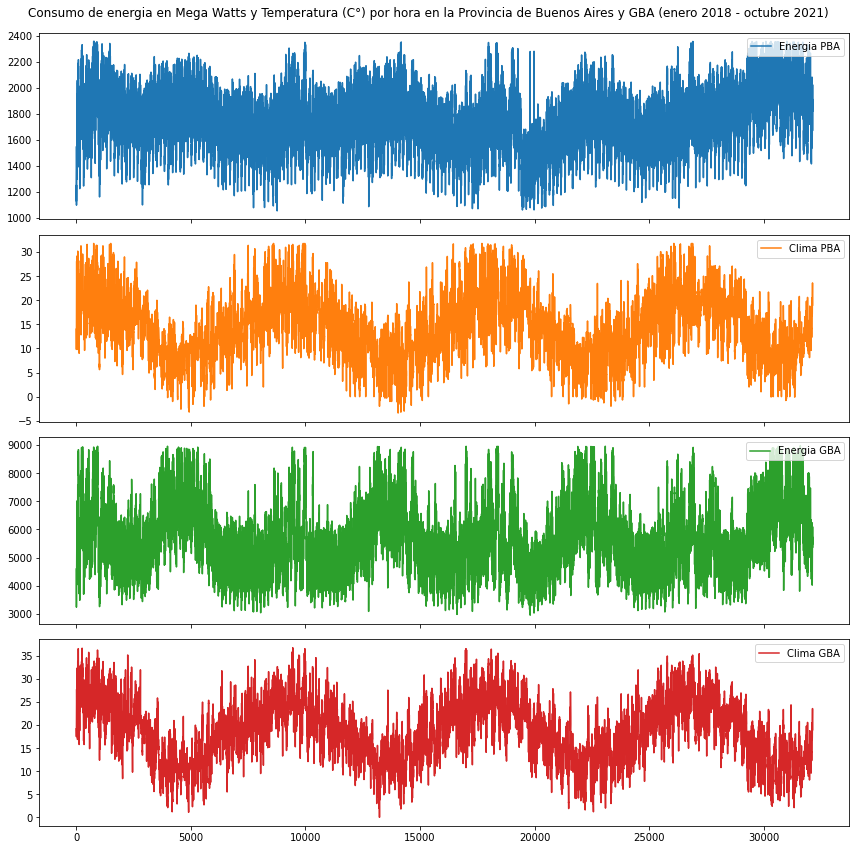

In [55]:
df[['Energia PBA', 'Clima PBA', 'Energia GBA', 'Clima GBA']].plot(subplots = True, figsize = (12,12))
[ax.legend(loc = 1) for ax in plt.gcf().axes]
plt.suptitle('Consumo de energia en Mega Watts y Temperatura (C°) por hora en la Provincia de Buenos Aires y GBA (enero 2018 - octubre 2021)')
plt.tight_layout()
plt.subplots_adjust(top = 0.95)

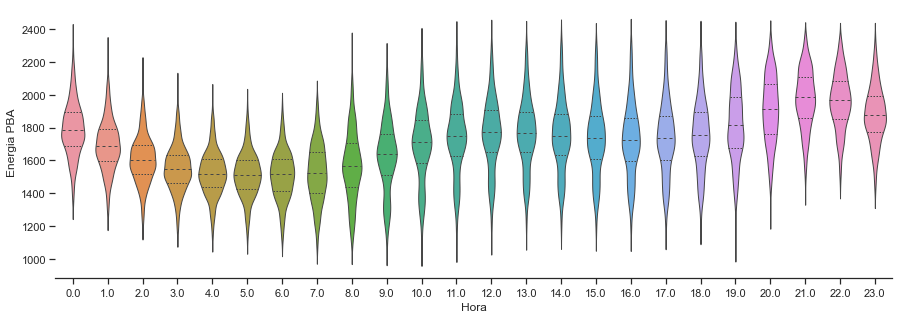

In [56]:
#Plot distribución por horas
plt.figure(figsize=(15,5))
sns.set_theme(style="ticks", palette="pastel")
sns.violinplot(data=df, x=df["Hora"], y=df["Energia PBA"],
               split=True, inner="quart", linewidth=1)
sns.despine(left=True)

<h1> Análisis de datos - PBA</h1>

Este apartado tiene como objetivo buscar insight en los datos que permitan definir algunas especificaciones del modelo

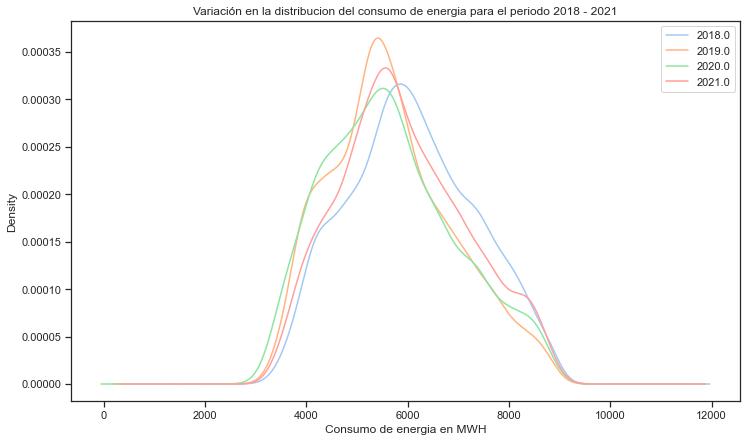

In [58]:
#Distribuciones por Año
df1 = df
for año in df1['Año'].unique():
    df1[(df1['Año'] == año) & (df['Mes'] < 9)]['Energia GBA'].plot(kind='density', figsize = (12,7), legend = True, label = año)
    _ = plt.xlabel('Consumo de energia en MWH')
    _ = plt.title('Variación en la distribucion del consumo de energia para el periodo 2018 - 2021')

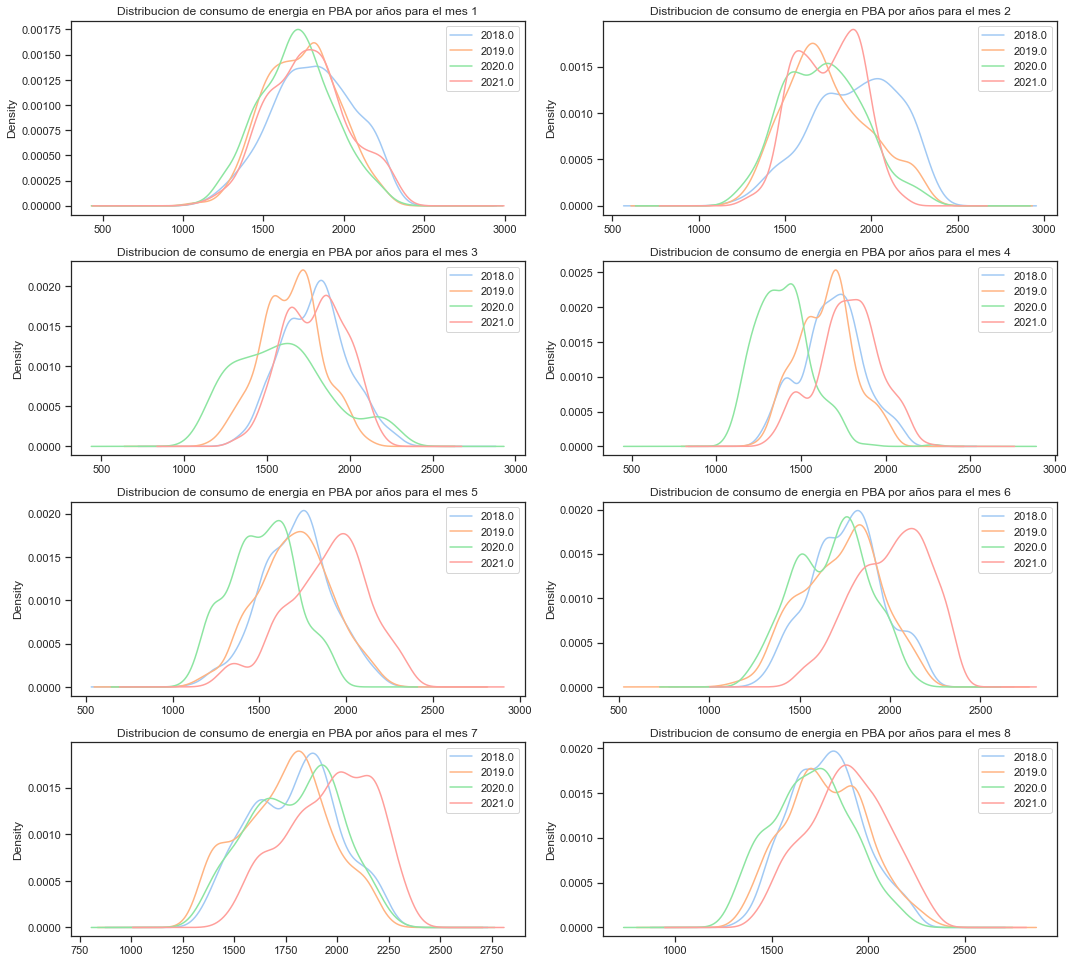

In [59]:
#Distribuciones por mes
f = plt.figure(figsize = (15,40))
mes = np.arange(1, 9) #Solo considera los primeros 8 meses del año, para los que tenemos datos en el 2021
for i, mes in enumerate(mes):
    ax = f.add_subplot(12,2,i+1)
    for j, year in enumerate(df['Año'].unique()):
        df[(df['Año'] == year) & (df['Mes'] == mes)]['Energia PBA'].\
                                plot(kind='density',  sharey=False, legend=True, label= year)
    plt.title('Distribucion de consumo de energia en PBA por años para el mes '+str(mes))

plt.tight_layout()

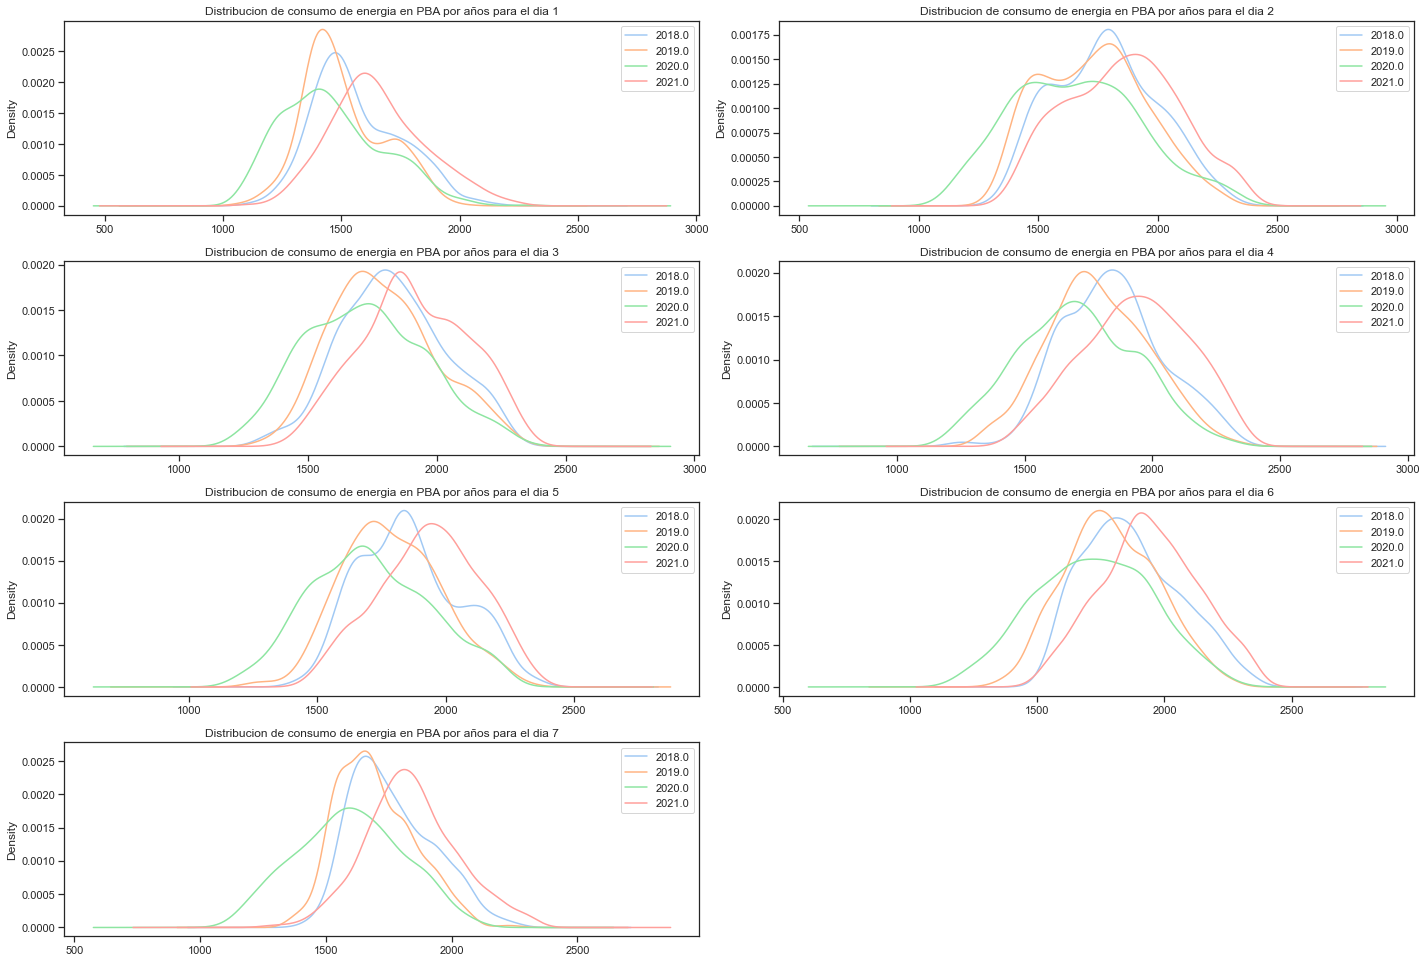

In [78]:
#Distribuciones por dia de la semana, para los primeros 8 meses del año
f = plt.figure(figsize = (20,40))
tipo_dia = [1, 2, 3, 4, 5, 6, 7]
for i, dia in enumerate(tipo_dia):
    ax = f.add_subplot(12,2,i+1)
    for j, year in enumerate(df['Año'].unique()):
        df[(df['Año'] == year) & (df['Tipo Dia'] == dia) & (df['Mes'] < 9)]['Energia PBA'].\
                                plot(kind='density',  sharey=False, legend=True, label= year)
    plt.title('Distribucion de consumo de energia en PBA por años para el dia '+str(dia))
plt.tight_layout()

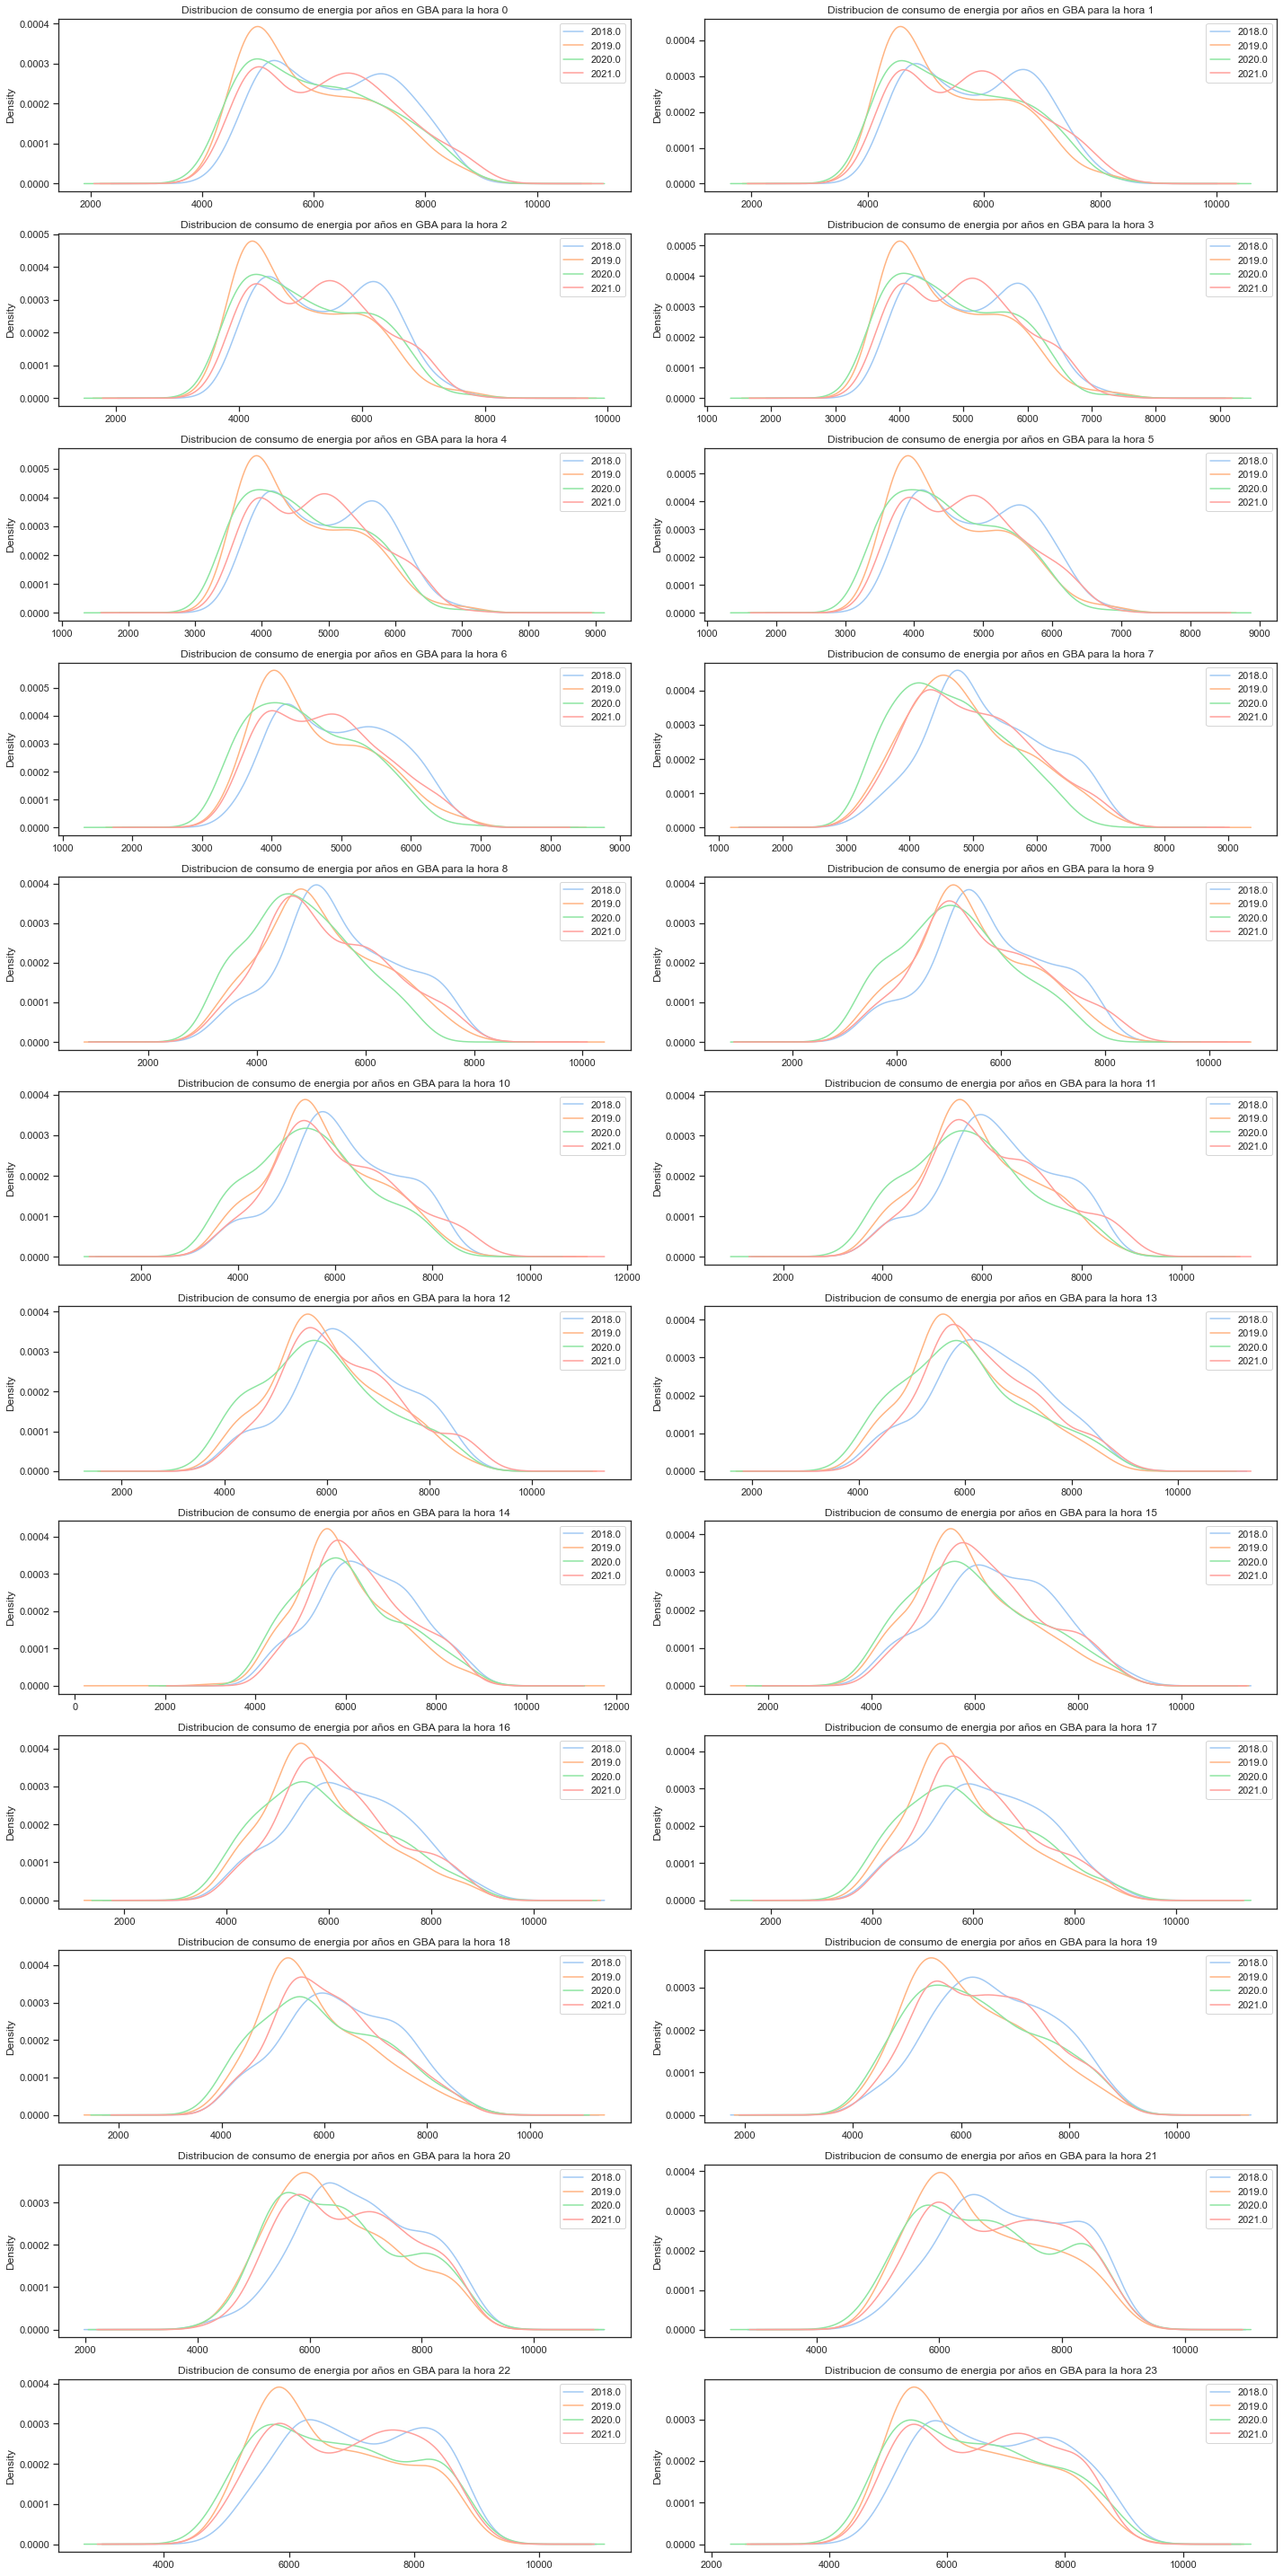

In [79]:
#Distribuciones por hora del dia
f = plt.figure(figsize = (20,40))
peak_hours = np.arange(0,24) 
for i, hour in enumerate(peak_hours):
    ax = f.add_subplot(12,2,i+1)
    for j, year in enumerate(df['Año'].unique()):
        df[(df['Año'] == year) & (df['Hora'] == hour) & (df['Mes'] < 9)]['Energia GBA'].\
                                plot(kind='density',  sharey=False, legend=True, label= year)
    plt.title('Distribucion de consumo de energia por años en GBA para la hora '+str(hour))
plt.tight_layout()